Intro:

The PwC global economic crime survey of 2016 suggests that approximately 36% of organizations experienced economic crime. Therefore, there is definitely a need to solve the problem of credit card fraud detection. The task of fraud detection often boils down to outlier detection, in which a dataset is scanned through to find potential anomalies in the data. In the past, this was done by employees  which checked all transactions manually. With the rise of machine learning, artificial intelligence, deep learning and other relevant fields of information technology, it becomes feasible to automate this process and to save some of the intensive amount of labor that is put into detecting credit card fraud. In this assignment, we'll train a model with pandas, seaborn and scikit-learn to create a fraud detection classifier.

Instructions:

Build a logistic regression model using Scikit-learn to predict fraudulent transactions by training it on [this kaggle dataset](https://www.kaggle.com/c/ieee-fraud-detection/data). Before you train the model, create at least 1 visualization of the data using the seaborn library of your choice. This should be submitted as a ""jupyter notebook". [This link](https://www.data-blogger.com/2017/06/15/fraud-detection-a-simple-machine-learning-approach/) will help you understand the flow of this process.


In [2]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.utils import resample
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('train_transaction.csv')
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Explore the dataset/Visualize

20663 frauds
569877 Non-frauds


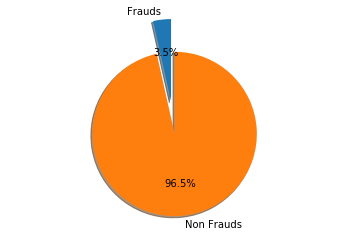

In [5]:
# Seperate frauds and non-frauds classes
frauds = df.loc[df["isFraud"] == 1]
non_frauds = df.loc[df['isFraud'] == 0]
print(len(frauds), "frauds")
print(len(non_frauds), "Non-frauds")

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frauds', 'Non Frauds'
sizes = [len(frauds), len(non_frauds)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode = (0, 0.4), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Note that there is an imbalance between frauds and non-frauds cases.

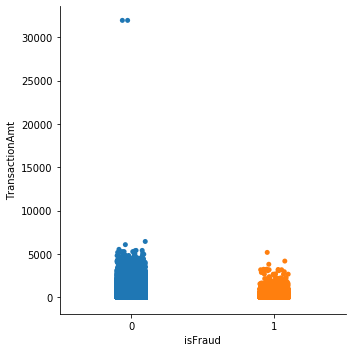

In [6]:
sns.catplot(x="isFraud", y="TransactionAmt", data=df)

Most frauds (depicted by 1 in the above graph) have transaction amount that's below 10,000, so are the non-frauds transactions. Refer to [this](https://towardsdatascience.com/dealing-with-imbalanced-classes-in-machine-learning-d43d6fa19d2) to see why class imbalance is dangerous in data science, and also [this](https://elitedatascience.com/imbalanced-classes) to see how to solve this problem.

In [20]:
# Solving the class imbalance problem
df_frauds = df.loc[df["isFraud"] == 1]
df_non_frauds = df.loc[df['isFraud'] == 0]


df_frauds_upsampled = resample(df_frauds,
                              replace=True, #sample with replacement to match the majority class frauds
                              n_samples=569877,
                              random_state=123) #reproduce the results
#note that we need to reset the index, as pandas append all new upsampled data to the end of the dataset
df_upsampled = pd.concat([df_non_frauds, df_frauds_upsampled]).reset_index()

frauds = df_upsampled.loc[df_upsampled["isFraud"] == 1]
non_frauds = df_upsampled.loc[df_upsampled['isFraud'] == 0]
print(len(frauds), "frauds")
print(len(non_frauds), "Non-frauds")

569877 frauds
569877 Non-frauds


Apply PCA

In [29]:
features = ['TransactionAmt'] + ['V%d' % number for number in range(1,339)] #change to 339 once complete
target = 'isFraud'
X = df_upsampled[features]
y = df_upsampled[target]
X = X.fillna(X.mean())

#standardising the features
X = StandardScaler().fit_transform(X)

#apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns = ['PCA1', 'PCA2'])

In [30]:
finalDf = pd.concat([principalDf, df_upsampled[[target]]], axis=1)

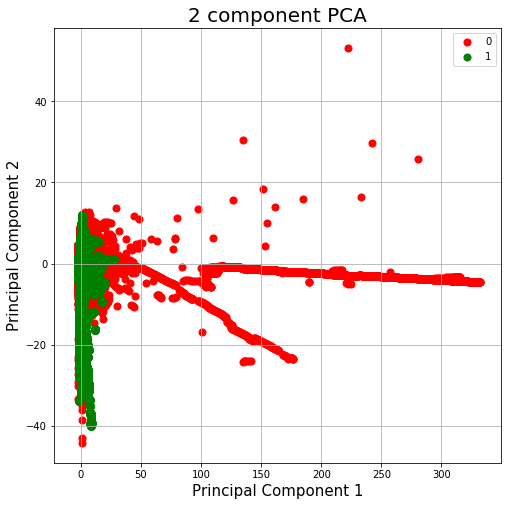

In [31]:
#Visualize 2D Projection

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['isFraud'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA1']
               , finalDf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [34]:
pca.explained_variance_ratio_


array([0.15440296, 0.10821335])

In [32]:
#Create a model function
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    print("Accuracy score is: ", score)
    print("Confusion Matrix: \n", matrix)
    print("Classification report \n", classification_report(y_test, y_pred))
    #return matrix, y_pred

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
RunModel(LogisticRegression(penalty='l2', solver='lbfgs'), X_train, y_train, X_test, y_test)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy score is:  0.760737903407752
Confusion Matrix: 
 [[165002  34382]
 [ 61063 138467]]
Classification report 
               precision    recall  f1-score   support

           0       0.73      0.83      0.78    199384
           1       0.80      0.69      0.74    199530

    accuracy                           0.76    398914
   macro avg       0.77      0.76      0.76    398914
weighted avg       0.77      0.76      0.76    398914



0.76 Accuracy is not great. Try other classification methods, such as [random forrest](https://towardsdatascience.com/detecting-credit-card-fraud-using-machine-learning-a3d83423d3b8).

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
rdmforest_classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')

RunModel(rdmforest_classifier, X_train, y_train, X_test, y_test)


Accuracy score is:  0.9506685651543941
Confusion Matrix: 
 [[192157   7227]
 [ 12452 187078]]
Classification report 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95    199384
           1       0.96      0.94      0.95    199530

    accuracy                           0.95    398914
   macro avg       0.95      0.95      0.95    398914
weighted avg       0.95      0.95      0.95    398914



### Test the model on testing set

In [37]:
#reading the test dataset
df_test = pd.read_csv('test_transaction.csv')


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
#Predicting the test dataset
temp1 = df_test[features]
test_full = temp1.fillna(temp1.mean())
isFraud_test = rdmforest_classifier.predict(test_full)

In [91]:
#combine the predicted result & the test dataset transactionid
transaction_id = df_test.iloc[:,0]
test_outcome = pd.concat([transaction_id, pd.Series(isFraud_test, name='isfraud')],  axis=1)

#export output to csv file
test_outcome.to_csv("submission.csv", index=False)

In [92]:
#some of the predicted results
test_outcome.head(50)

,TransactionID,isfraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0
5,3663554,0
6,3663555,0
7,3663556,0
8,3663557,0
9,3663558,0
